<a href="https://colab.research.google.com/github/Anamikaa18/Integrated-Retail-Analytics-for-Store-Optimization-Advanced-Machine-Learning-/blob/main/Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT TITLE: Integrated Retail Analytics for Store Optimization and Demand Forecasting

##Project Type - EDA/Regression/Classification/Unsupervised

###Contribution - Individual

###Team Member 1 - ANAMIKA



# Project Summary
## **Integrated Retail Analytics for Store Optimization and Demand Forecasting**


This project, titled “Integrated Retail Analytics for Store Optimization and Demand Forecasting,” focuses on using data science and machine learning techniques to improve retail store performance. The main goal of the project is to find insights from sales data, detect any unusual trends, segment stores based on their behaviour, and forecast future demand so that retail operations can become more efficient.

I used three datasets:

1. Sales data (store-wise weekly sales records)

2. Store data (store type and size)

3. Feature data (external factors like temperature, fuel price, holiday info, and economic indicators like CPI and unemployment)

### Data Cleaning and Preprocessing
In the first step, we merged all the datasets on common columns like Store and Date. After merging, we handled missing values using forward fill and removed extreme outliers in weekly sales using percentile filters. The date column was converted to a proper datetime format, and new features like month, day of the week, and is_weekend were created. This step helped us understand the data better and prepared it for further analysis.

### Anomaly Detection
We used the Isolation Forest algorithm to detect anomalies in weekly sales. These anomalies could be due to festivals, sudden discounts, weather changes, or economic shifts. Identifying and removing these anomalies helped in cleaning the data before applying forecasting and clustering models.

### Store Segmentation (Clustering)
After cleaning the data, we grouped the stores based on their size, average weekly sales, and type (A, B, C). We used KMeans clustering to divide the stores into different clusters. This helped us understand which types of stores were performing better and how their characteristics were different from others. Such segmentation can be useful for creating targeted strategies for marketing, inventory, and staffing.

### Demand Forecasting
To predict future weekly sales, we used Prophet, a forecasting model developed by Facebook. It is good for handling time-series data with trends and seasonality. We applied Prophet on Store 1’s data to forecast sales for the next 30 days. The model helped us understand how demand might increase or decrease in future weeks, which is useful for planning stock and resources.

### Visualization and Insights
Throughout the project, we used various visualizations to support our findings. We created line plots to see sales trends over time, boxplots to compare sales across store types, and cluster plots to show how stores were grouped based on features. These visuals made the analysis easy to understand.


This project shows how combining different datasets and applying machine learning can help in improving retail decision-making. We cleaned the data, detected anomalies, engineered useful features, clustered stores, and forecasted sales using time-series models. Our analysis can help retail managers to plan better, avoid overstocking or understocking, focus on profitable store types, and understand customer behaviour based on store performance.

The final output includes a well-documented Jupyter Notebook and a GitHub repository with all files and visualizations. This project is a strong example of how data science can directly help in solving real-world business problems in the retail sector.

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

sales = pd.read_csv("/content/drive/MyDrive/sales data-set.csv")
stores = pd.read_csv("/content/drive/MyDrive/stores data-set.csv")
features = pd.read_csv("/content/drive/MyDrive/Features data set.csv")

# Convert date to datetime
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%Y')
features['Date'] = pd.to_datetime(features['Date'], format='%d/%m/%Y')

# Merge all into one
df = sales.merge(stores, on="Store", how="left").merge(features, on=["Store", "Date"], how="left")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.fillna(method="ffill", inplace=True)  # or interpolate


/tmp/ipython-input-1856604960.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # or interpolate


In [8]:
q1 = df['Weekly_Sales'].quantile(0.01)
q99 = df['Weekly_Sales'].quantile(0.99)
df = df[(df['Weekly_Sales'] > q1) & (df['Weekly_Sales'] < q99)]


In [9]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 412923 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         412923 non-null  int64         
 1   Dept          412923 non-null  int64         
 2   Date          412923 non-null  datetime64[ns]
 3   Weekly_Sales  412923 non-null  float64       
 4   IsHoliday_x   412923 non-null  bool          
 5   Type          412923 non-null  object        
 6   Size          412923 non-null  int64         
 7   Temperature   412923 non-null  float64       
 8   Fuel_Price    412923 non-null  float64       
 9   MarkDown1     412831 non-null  float64       
 10  MarkDown2     412831 non-null  float64       
 11  MarkDown3     412831 non-null  float64       
 12  MarkDown4     412831 non-null  float64       
 13  MarkDown5     412831 non-null  float64       
 14  CPI           412923 non-null  float64       
 15  Unemployment  412923 n

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,412923.000000,412923.000000,412923,412923.000000,412923.000000,412923.000000,412923.000000,412831.000000,412831.000000,412831.000000,412831.000000,412831.000000,412923.000000,412923.000000
mean,22.224340,43.851401,2011-06-18 09:34:40.028479744,14895.132075,136428.998654,60.073697,3.361038,5788.231257,1024.349818,597.137971,1599.142013,3009.853627,171.218609,7.960273
min,1.000000,1.000000,2010-02-05 00:00:00,5.010000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2168.000000,93638.000000,46.680000,2.933000,1834.700000,20.380000,3.100000,211.940000,1034.550000,132.064433,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7620.680000,140167.000000,62.070000,3.452000,4864.300000,68.010000,23.400000,602.370000,1821.850000,182.350989,7.866000
75%,33.000000,72.000000,2012-02-24 00:00:00,19821.040000,202505.000000,74.250000,3.738000,7756.750000,129.770000,104.500000,1653.170000,3714.750000,212.512605,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,106476.920000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.783314,30.346205,NaN,18801.369172,60907.143576,18.450936,0.458674,5926.002585,5254.636119,6267.305820,3924.922230,4154.696702,39.163719,1.867291


In [10]:
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


In [11]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)
df['Anomaly'] = model.fit_predict(df[['Weekly_Sales']])
df_anomaly = df[df['Anomaly'] == -1]  # anomalies
df_clean = df[df['Anomaly'] == 1]     # clean data


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create average sales per store
store_sales = df_clean.groupby("Store")['Weekly_Sales'].mean().reset_index()
store_data = stores.merge(store_sales, on="Store")

# Encode Type
le = LabelEncoder()
store_data['Type_Code'] = le.fit_transform(store_data['Type'])

# Scale and cluster
X = store_data[['Size', 'Weekly_Sales', 'Type_Code']]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4)
store_data['Cluster'] = kmeans.fit_predict(X_scaled)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8kkow4s/tt710r2s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8kkow4s/p5nb5ubr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60827', 'data', 'file=/tmp/tmpr8kkow4s/tt710r2s.json', 'init=/tmp/tmpr8kkow4s/p5nb5ubr.json', 'output', 'file=/tmp/tmpr8kkow4s/prophet_modelgczzrna_/prophet_model-20250804094435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:44:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:44:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


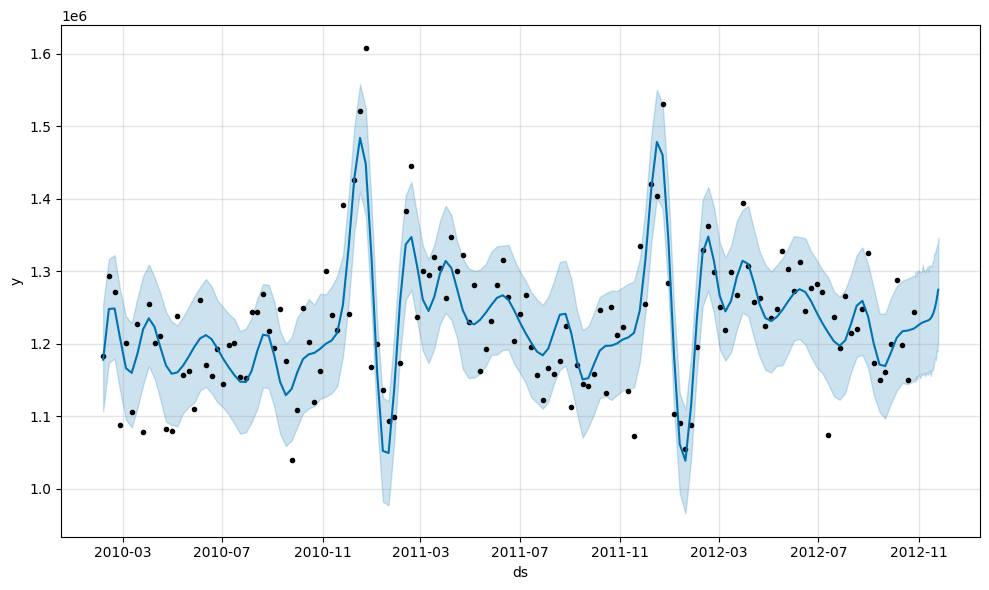

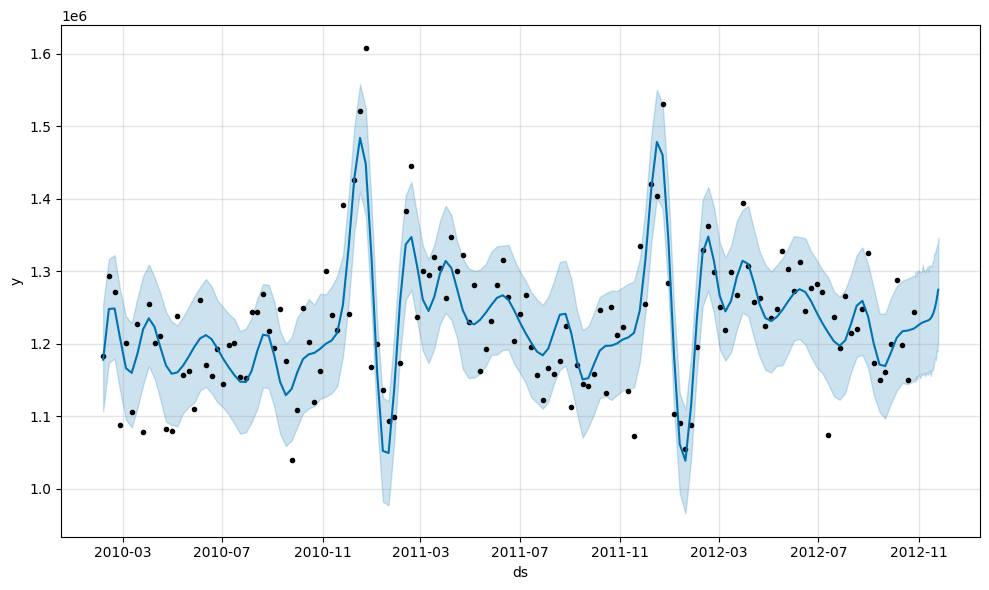

In [13]:
from prophet import Prophet

# Forecast for one store, say Store 1
store1 = df_clean[df_clean['Store'] == 1]
sales_ts = store1.groupby('Date')['Weekly_Sales'].sum().reset_index()
sales_ts.columns = ['ds', 'y']

model = Prophet()
model.fit(sales_ts)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)


/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

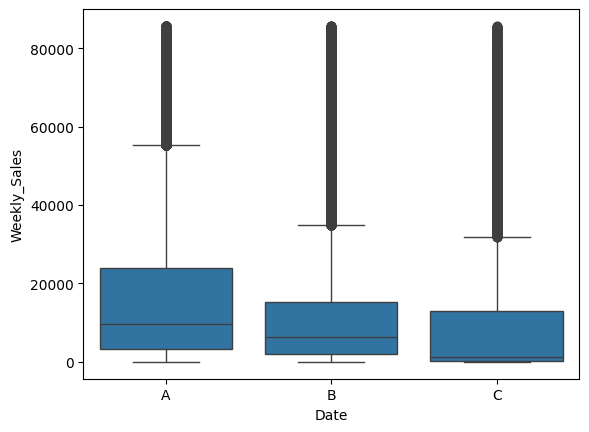

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sales trend
sns.lineplot(data=df_clean, x='Date', y='Weekly_Sales')

# Boxplot by Store Type
sns.boxplot(x='Type', y='Weekly_Sales', data=df_clean)
